<a href="https://colab.research.google.com/github/Gmejia2022/AA_Gmejia_ExamenFinal/blob/main/Proyecto_Examen_Gmejia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto 4: Prediccion de Calificacion Estudiantil

- **Autor:** Gonzalo Mejia Alcivar
- **Curso:** Aprendizaje Automatico - Examen Practico Final
- **Fecha:** 21 de Febrero dle 2026
- **Tipo:** Aprendizaje Supervisado - Regresion
- **Dataset:** Estudiantes_Notas.csv

**Objetivo:** Desarrollar un modelo de regresion que prediga la calificacion final de los estudiantes con base en factores como asistencia, horas de estudio, desempeno en tareas previas y participacion en clase, para identificar alumnos en riesgo academico.

**Estructura del notebook:**
1. Preparacion del entorno
2. Carga y Analisis Exploratorio de Datos (EDA)
3. Preprocesamiento de datos
4. Visualizacion de datos
5. Entrenamiento de modelos de regresion
6. Evaluacion y comparacion de modelos
7. Exportacion de resultados
8. Analisis critico

## Parte 1: Preparacion del entorno

En esta seccion se importan todas las Librerias necesarias para el desarrollo del proyecto:
- **pandas** y **numpy** para manipulacion y analisis de datos.
- **matplotlib** y **seaborn** para visualizacion de datos.
- **scikit-learn** para modelos de regresion, preprocesamiento y metricas de evaluacion.
- **joblib** para exportar el modelo entrenado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modelos de regresion
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Preprocesamiento y evaluacion
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Exportacion del modelo
import joblib

# Configuracion de graficos
plt.rcParams['figure.figsize'] = (10, 6)  # Tamano por defecto de las figuras
plt.rcParams['figure.dpi'] = 100           # Resolucion de las figuras
sns.set_style('whitegrid')                 # Estilo de los graficos
print("Librerias cargadas correctamente.")

Librerias cargadas correctamente.


## Parte 2: Carga y Analisis Exploratorio de Datos (EDA)

En esta seccion se carga el dataset y se realiza un Analisis Exploratorio de Datos (EDA):
- Se verifican las dimensiones del dataset y se visualizan las primeras filas.
- Se identifican los tipos de datos de cada columna.
- Se detectan valores faltantes y registros duplicados.
- Se calculan estadisticas descriptivas (media, desviacion estandar, minimo, maximo, cuartiles).
- Se describe el significado de cada variable del dataset.

In [ ]:
# Parte 2: Carga y exploracion inicial del dataset
df = pd.read_csv('Estudiantes_Notas.csv')

print("=" * 60)
print("Informacion del DataSet")
print("=" * 60)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas:")
df.head()

Informacion del DataSet

Dimensiones: 800 filas x 6 columnas

Primeras 5 filas:


,estudiante_id,asistencia_pct,horas_estudio,desempeno_tareas,participacion_clase,calificacion_final
0,E0001,81.0,7.36,5.15,5,5.21
1,E0002,61.0,8.95,5.48,2,5.04
2,E0003,67.0,8.77,7.83,3,7.07
3,E0004,56.0,13.89,8.00,4,7.30
4,E0005,73.0,6.86,5.44,1,5.70


In [ ]:
# Parte 2.1: Tipos de datos y valores faltantes
print("Tipos de datos:")
print(df.dtypes)
print(f"\nValores faltantes por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores faltantes: {df.isnull().sum().sum()}")
print(f"\nDuplicados: {df.duplicated().sum()}")

Tipos de datos:
estudiante_id           object
asistencia_pct         float64
horas_estudio          float64
desempeno_tareas       float64
participacion_clase      int64
calificacion_final     float64
dtype: object

Valores faltantes por columna:
estudiante_id           0
asistencia_pct         24
horas_estudio          24
desempeno_tareas       24
participacion_clase     0
calificacion_final      0
dtype: int64

Total de valores faltantes: 72

Duplicados: 0


In [ ]:
# Parte 2.2: Estadisticas descriptivas de las variables numericas
print("descriptivas:")
df.describe()

descriptivas:


,asistencia_pct,horas_estudio,desempeno_tareas,participacion_clase,calificacion_final
count,776.000000,776.000000,776.000000,800.00000,800.000000
mean,75.056701,10.023015,7.486624,2.98125,6.592725
std,14.828286,2.900774,1.484430,1.38050,0.963753
min,50.000000,1.290000,5.000000,1.00000,4.080000
25%,62.000000,7.987500,6.197500,2.00000,5.950000
50%,75.000000,9.955000,7.530000,3.00000,6.580000
75%,88.000000,11.982500,8.760000,4.00000,7.270000
max,100.000000,19.780000,9.990000,5.00000,9.390000


In [ ]:
# Parte 2.3: Descripcion de las variables del dataset
print("=" * 60)
print("Descripcion de las Variables")
print("=" * 60)
print("""
- estudiante_id:       Identificador unico del estudiante (no se usa como feature)
- asistencia_pct:      Porcentaje de asistencia a clases (0-100%)
- horas_estudio:       Horas semanales dedicadas al estudio
- desempeno_tareas:    Calificacion promedio en tareas previas (escala 1-10)
- participacion_clase: Nivel de participacion en clase (escala 1-5, ordinal)
- calificacion_final:  VARIABLE OBJETIVO - Calificacion final del estudiante
""")

Descripcion de las Variables

- estudiante_id:       Identificador unico del estudiante (no se usa como feature)
- asistencia_pct:      Porcentaje de asistencia a clases (0-100%)
- horas_estudio:       Horas semanales dedicadas al estudio
- desempeno_tareas:    Calificacion promedio en tareas previas (escala 1-10)
- participacion_clase: Nivel de participacion en clase (escala 1-5, ordinal)
- calificacion_final:  VARIABLE OBJETIVO - Calificacion final del estudiante



## Parte 3: Preprocesamiento de datos

En esta seccion se preparan los datos para el modelado:
- Se elimina la columna `estudiante_id` (no aporta informacion predictiva).
- Se imputan los valores faltantes utilizando la **mediana** de cada columna, ya que es robusta ante outliers.
- Se detectan y analizan outliers con el metodo IQR.
- Se dividen los datos en conjuntos de entrenamiento (80%) y prueba (20%).
- Se escalan las variables numericas para que tengan media 0 y desviacion estandar 1, lo cual beneficia a modelos sensibles a la escala.

In [ ]:
# Parte 3.1: Separar features y variable objetivo
# Eliminamos estudiante_id ya que es solo un identificador
df_model = df.drop(columns=['estudiante_id'])

# Definir features (X) y variable objetivo (y)
features = ['asistencia_pct', 'horas_estudio', 'desempeno_tareas', 'participacion_clase']

print(f"Valores faltantes ANTES de imputar:")
print(df_model[features].isnull().sum())
print(f"Total: {df_model[features].isnull().sum().sum()} valores faltantes")

Valores faltantes ANTES de imputar:
asistencia_pct         24
horas_estudio          24
desempeno_tareas       24
participacion_clase     0
dtype: int64
Total: 72 valores faltantes


In [ ]:
# Parte 3.2: Imputacion de valores faltantes con la mediana
# Se usa la mediana porque es robusta ante valores atipicos (outliers)
for col in features:
    if df_model[col].isnull().sum() > 0:
        mediana = df_model[col].median()
        df_model[col] = df_model[col].fillna(mediana)
        print(f"  {col}: {df_model[col].isnull().sum()} NaN imputados con mediana = {mediana:.2f}")

print(f"\nValores faltantes DESPUES de imputar:")
print(df_model[features].isnull().sum())
print(f"Total: {df_model[features].isnull().sum().sum()} valores faltantes")

# Definir X e y
X = df_model[features]
y = df_model['calificacion_final']

print(f"\nFeatures ({len(features)}): {features}")
print(f"Variable objetivo: calificacion_final")
print(f"Forma de X: {X.shape} | Forma de y: {y.shape}")

  asistencia_pct: 0 NaN imputados con mediana = 75.00
  horas_estudio: 0 NaN imputados con mediana = 9.96
  desempeno_tareas: 0 NaN imputados con mediana = 7.53

Valores faltantes DESPUES de imputar:
asistencia_pct         0
horas_estudio          0
desempeno_tareas       0
participacion_clase    0
dtype: int64
Total: 0 valores faltantes

Features (4): ['asistencia_pct', 'horas_estudio', 'desempeno_tareas', 'participacion_clase']
Variable objetivo: calificacion_final
Forma de X: (800, 4) | Forma de y: (800,)


In [ ]:
# Parte 3.3: Deteccion de outliers con el metodo IQR
print("=" * 60)
print("Detectar Outliers (Metodo IQR)")
print("=" * 60)

for col in features + ['calificacion_final']:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_model[(df_model[col] < lower) | (df_model[col] > upper)]
    print(f"{col}: {len(outliers)} outliers (rango valido: [{lower:.2f}, {upper:.2f}])")

print("\nNota: No se eliminan outliers ya que representan estudiantes reales")
print("con rendimiento extremo (muy alto o muy bajo), esta informacion puede ser valiosa para el modelo.")

Detectar Outliers (Metodo IQR)
asistencia_pct: 0 outliers (rango valido: [23.00, 127.00])
horas_estudio: 7 outliers (rango valido: [2.24, 17.73])
desempeno_tareas: 0 outliers (rango valido: [2.48, 12.49])
participacion_clase: 0 outliers (rango valido: [-1.00, 7.00])
calificacion_final: 1 outliers (rango valido: [3.97, 9.25])

Nota: No se eliminan outliers ya que representan estudiantes reales
con rendimiento extremo (muy alto o muy bajo), esta informacion puede ser valiosa para el modelo.


In [ ]:
# Parte 3.4: Division en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Conjunto de prueba:        {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.0f}%)")

Conjunto de entrenamiento: 640 muestras (80%)
Conjunto de prueba:        160 muestras (20%)


In [ ]:
# Parte 3.5: Escalado de variables con StandardScaler
# Se ajusta el scaler SOLO con datos de entrenamiento para evitar data leakage
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=features, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), columns=features, index=X_test.index
)

print("Estadistica despues del Escalado (conjunto de entrenamiento):")
X_train_scaled.describe().round(2)

Estadistica despues del Escalado (conjunto de entrenamiento):


,asistencia_pct,horas_estudio,desempeno_tareas,participacion_clase
count,640.00,640.00,640.00,640.00
mean,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.72,-3.01,-1.67,-1.47
25%,-0.90,-0.66,-0.86,-0.74
50%,-0.01,-0.02,0.04,-0.01
75%,0.88,0.64,0.86,0.72
max,1.70,3.37,1.70,1.45


## Parte 4: Visualizacion de datos

Se crean visualizaciones para entender la distribucion de las variables, sus relaciones con la variable objetivo y las correlaciones entre ellas.

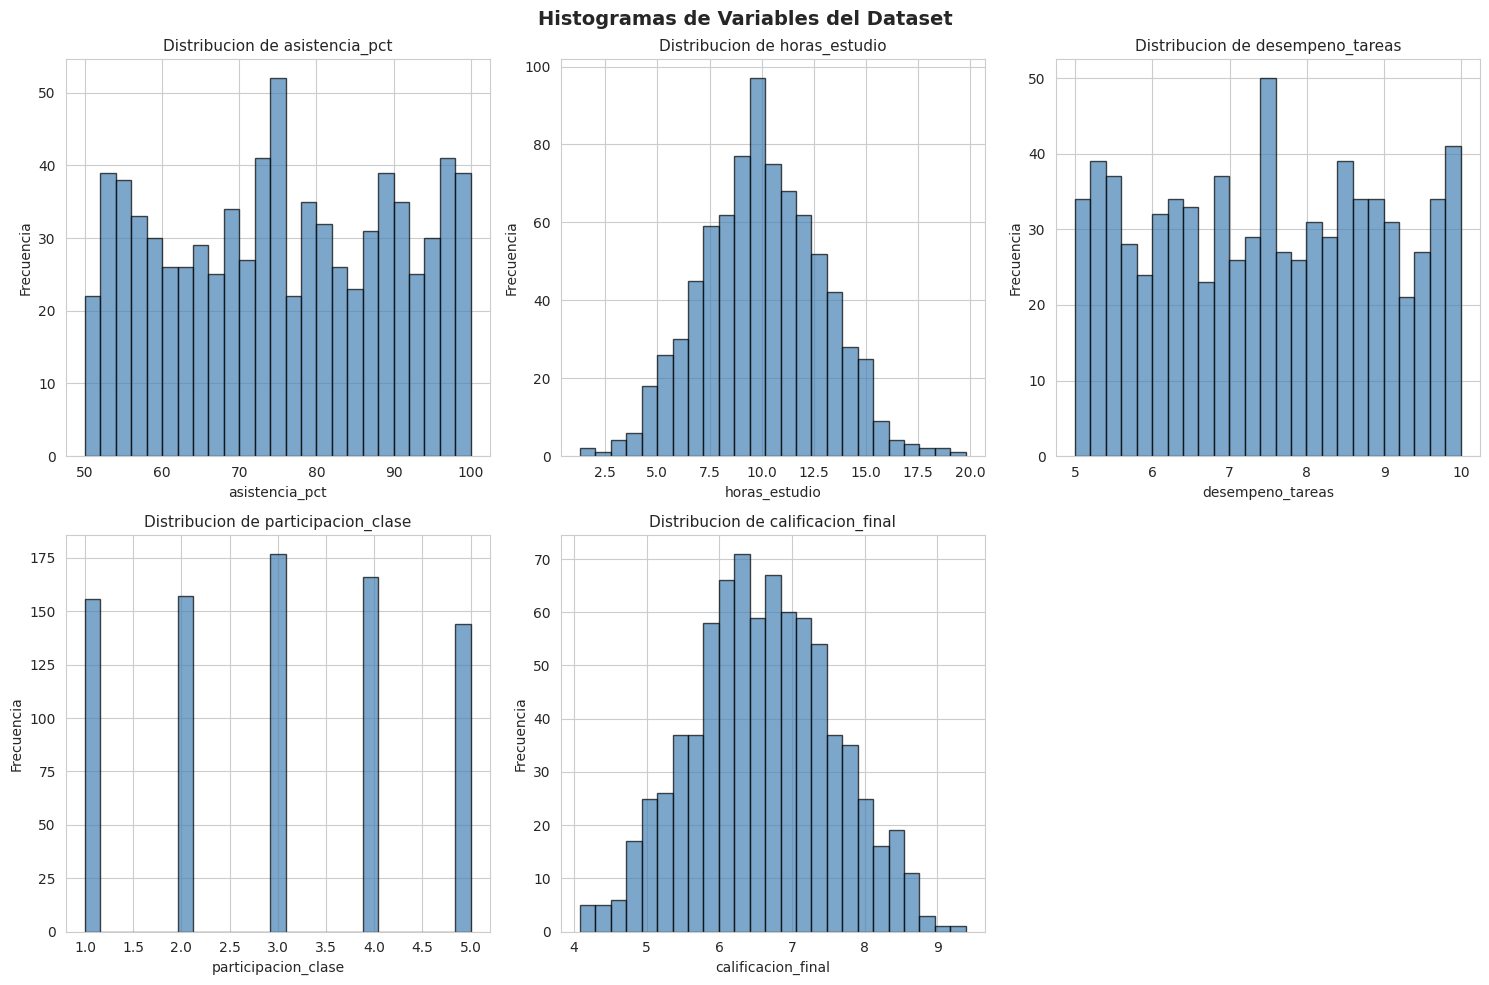

In [ ]:
# Parte 4.1: Histogramas de todas las variables numericas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cols_to_plot = ['asistencia_pct', 'horas_estudio', 'desempeno_tareas',
                'participacion_clase', 'calificacion_final']

for i, col in enumerate(cols_to_plot):
    ax = axes[i // 3, i % 3]
    ax.hist(df_model[col], bins=25, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribucion de {col}', fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar el subplot vacio
axes[1, 2].set_visible(False)
plt.suptitle('Histogramas de Variables del Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

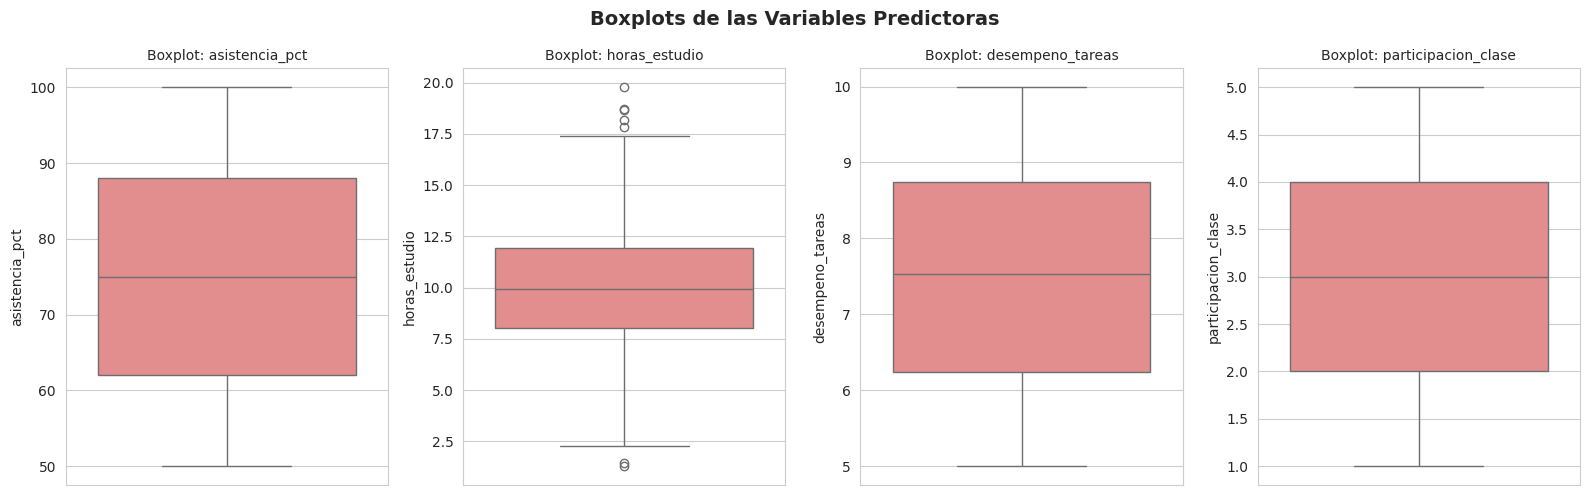

In [ ]:
# Parte 4.2: Boxplots para detectar outliers visualmente
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for i, col in enumerate(features):
    sns.boxplot(data=df_model, y=col, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot: {col}', fontsize=10)

plt.suptitle('Boxplots de las Variables Predictoras', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

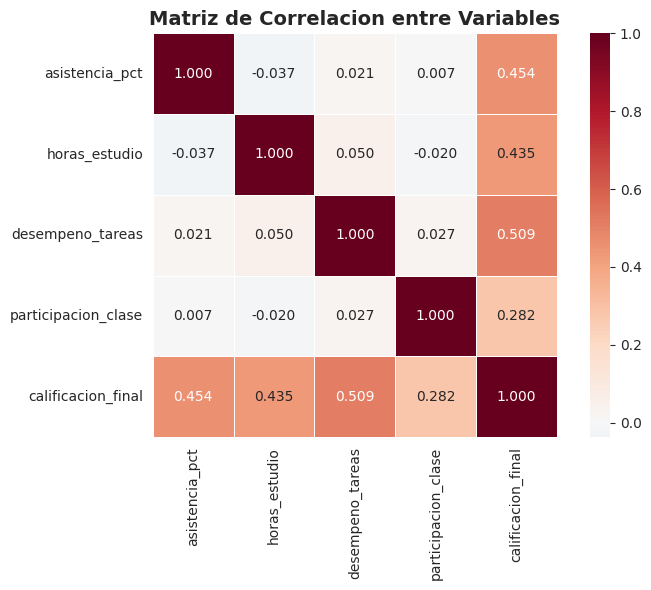


Correlacion de cada feature con calificacion_final:
desempeno_tareas       0.509412
asistencia_pct         0.454123
horas_estudio          0.434768
participacion_clase    0.282079
Name: calificacion_final, dtype: float64


In [ ]:
# Parte 4.3: Matriz de correlacion
plt.figure(figsize=(8, 6))
correlation_matrix = df_model.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            fmt='.3f', square=True, linewidths=0.5)
plt.title('Matriz de Correlacion entre Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelacion de cada feature con calificacion_final:")
print(correlation_matrix['calificacion_final'].drop('calificacion_final').sort_values(ascending=False))

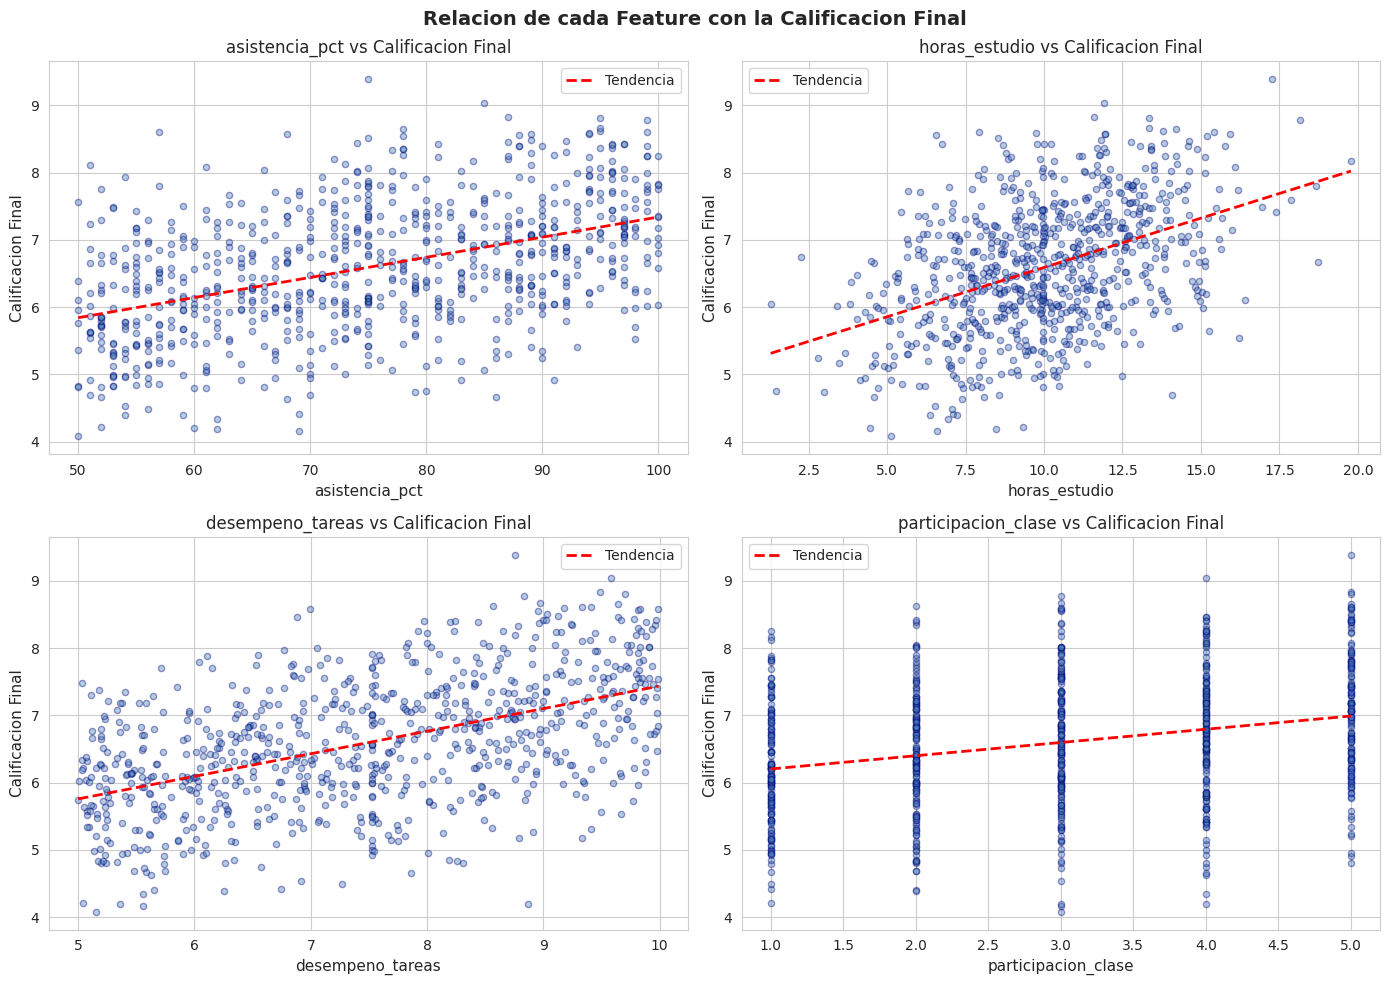

In [ ]:
# Parte 4.4: Scatter plots de cada feature vs calificacion final
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    # Filtrar filas sin NaN para esta columna
    mask = df_model[[col, 'calificacion_final']].dropna().index
    x_clean = df_model.loc[mask, col]
    y_clean = df_model.loc[mask, 'calificacion_final']

    ax.scatter(x_clean, y_clean, alpha=0.4, color='steelblue', edgecolors='navy', s=20)
    # Linea de tendencia (solo con datos limpios)
    z = np.polyfit(x_clean, y_clean, 1)
    p = np.poly1d(z)
    x_line = np.linspace(x_clean.min(), x_clean.max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2, label='Tendencia')
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Calificacion Final', fontsize=11)
    ax.set_title(f'{col} vs Calificacion Final', fontsize=12)
    ax.legend()

plt.suptitle('Relacion de cada Feature con la Calificacion Final', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

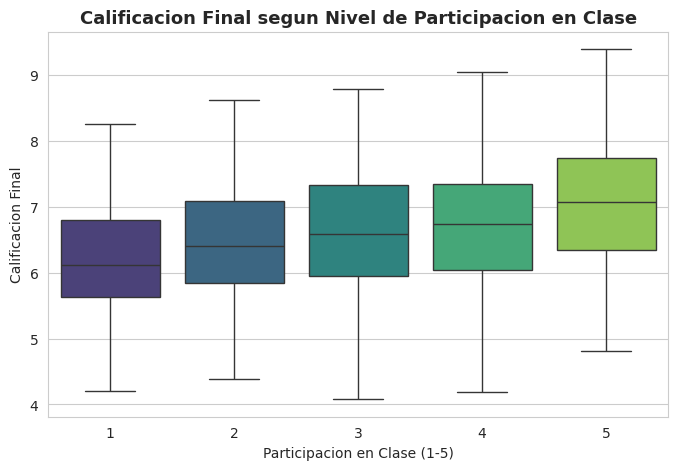

In [ ]:
# Parte 4.5: Boxplot de calificacion final segun nivel de participacion
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_model, x='participacion_clase', y='calificacion_final', palette='viridis')
plt.title('Calificacion Final segun Nivel de Participacion en Clase', fontsize=13, fontweight='bold')
plt.xlabel('Participacion en Clase (1-5)')
plt.ylabel('Calificacion Final')
plt.show()

## Parte 5: Entrenamiento de modelos de regresion

Se entrenan **3 modelos** de regresion para comparar su desempeno:

1. **Regresion Lineal**: Modelo base, asume relacion lineal entre las features y la variable objetivo.
2. **Random Forest Regressor**: Modelo de ensamble basado en arboles de decision, captura relaciones no lineales.
3. **Gradient Boosting Regressor**: Modelo de ensamble que construye arboles secuencialmente, corrigiendo los errores del anterior.

In [ ]:
# Parte 5.1: Modelo 1 - Regresion Lineal
print("=" * 60)
print("MODELO 1: Regresion Lineal")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Coeficientes del modelo
print("\nCoeficientes del modelo:")
for feat, coef in zip(features, lr_model.coef_):
    print(f"  {feat:25s}: {coef:+.4f}")
print(f"  {'Intercepto':25s}: {lr_model.intercept_:+.4f}")

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)

# Validacion cruzada (5 folds) sobre el conjunto de entrenamiento
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\nValidacion cruzada R² (5 folds): {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

MODELO 1: Regresion Lineal

Coeficientes del modelo:
  asistencia_pct           : +0.4387
  horas_estudio            : +0.4318
  desempeno_tareas         : +0.4509
  participacion_clase      : +0.2544
  Intercepto               : +6.5961

Validacion cruzada R² (5 folds): 0.7063 (+/- 0.0210)


In [ ]:
# Parte 5.2: Modelo 2 - Random Forest Regressor
print("=" * 60)
print("MODELO 2: RANDOM FOREST REGRESSOR")
print("=" * 60)

rf_model = RandomForestRegressor(
    n_estimators=200,      # Numero de srboles en el bosque
    max_depth=10,          # Profundidad msxima de cada arbol
    min_samples_split=5,   # Minimo de muestras para dividir un nodo
    min_samples_leaf=2,    # Minimo de muestras en una hoja
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Importancia de las features
print("\nImportancia de las features (Random Forest):")
importances_rf = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
for feat, imp in importances_rf.items():
    print(f"  {feat:25s}: {imp:.4f} ({imp*100:.1f}%)")

# Validacion cruzada
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\nValidacion cruzada R² (5 folds): {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

MODELO 2: RANDOM FOREST REGRESSOR

Importancia de las features (Random Forest):
  desempeno_tareas         : 0.3376 (33.8%)
  asistencia_pct           : 0.3023 (30.2%)
  horas_estudio            : 0.2812 (28.1%)
  participacion_clase      : 0.0789 (7.9%)

Validacion cruzada R² (5 folds): 0.6307 (+/- 0.0455)


In [ ]:
# Parte 5.3: Modelo 3 - Gradient Boosting Regressor
print("=" * 60)
print("MODELO 3: GRADIENT BOOSTING REGRESSOR")
print("=" * 60)

gb_model = GradientBoostingRegressor(
    n_estimators=200,      # Numero de etapas de boosting
    max_depth=5,           # Profundidad maxima de cada arbol
    learning_rate=0.1,     # Tasa de aprendizaje
    min_samples_split=5,   # Minimo de muestras para dividir
    min_samples_leaf=2,    # Minimo de muestras en hoja
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test_scaled)

# Importancia de las features
print("\nImportancia de las features (Gradient Boosting):")
importances_gb = pd.Series(gb_model.feature_importances_, index=features).sort_values(ascending=False)
for feat, imp in importances_gb.items():
    print(f"  {feat:25s}: {imp:.4f} ({imp*100:.1f}%)")

# Validacion cruzada
cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\nValidacion cruzada R² (5 folds): {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std():.4f})")

MODELO 3: GRADIENT BOOSTING REGRESSOR

Importancia de las features (Gradient Boosting):
  desempeno_tareas         : 0.3401 (34.0%)
  horas_estudio            : 0.2906 (29.1%)
  asistencia_pct           : 0.2837 (28.4%)
  participacion_clase      : 0.0856 (8.6%)

Validacion cruzada R² (5 folds): 0.5751 (+/- 0.0447)


## Parte 6: Evaluacion y comparacion de modelos

Se evaluan los 3 modelos usando las metricas estandar de regresion:
- **MAE** (Mean Absolute Error): Error promedio absoluto, facil de interpretar.
- **RMSE** (Root Mean Squared Error): Penaliza mas los errores grandes.
- **R²** (Coeficiente de determinacion): Proporcion de la varianza explicada por el modelo (1 = perfecto, 0 = no explica nada).

In [ ]:
# Parte 6.1: Funcion auxiliar para calcular metricas
def evaluar_modelo(nombre, y_real, y_pred):
    """Calcula y retorna las metricas de regresion para un modelo."""
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)
    return {'Modelo': nombre, 'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Evaluar los 3 modelos
resultados = [
    evaluar_modelo('Regresion Lineal', y_test, y_pred_lr),
    evaluar_modelo('Random Forest', y_test, y_pred_rf),
    evaluar_modelo('Gradient Boosting', y_test, y_pred_gb)
]

# Tabla comparativa
df_resultados = pd.DataFrame(resultados).set_index('Modelo')
print("=" * 60)
print("Comparacion de los Modelos con los datos de Prueba")
print("=" * 60)
print(df_resultados.round(4).to_string())

# Identificar mejor modelo
mejor_modelo = df_resultados['R²'].idxmax()
print(f"\nMejor modelo segun R²: {mejor_modelo} (R² = {df_resultados.loc[mejor_modelo, 'R²']:.4f})")

Comparacion de los Modelos con los datos de Prueba
                      MAE    RMSE      R²
Modelo                                   
Regresion Lineal   0.4336  0.5395  0.7164
Random Forest      0.4658  0.5786  0.6738
Gradient Boosting  0.4751  0.5848  0.6668

Mejor modelo segun R²: Regresion Lineal (R² = 0.7164)


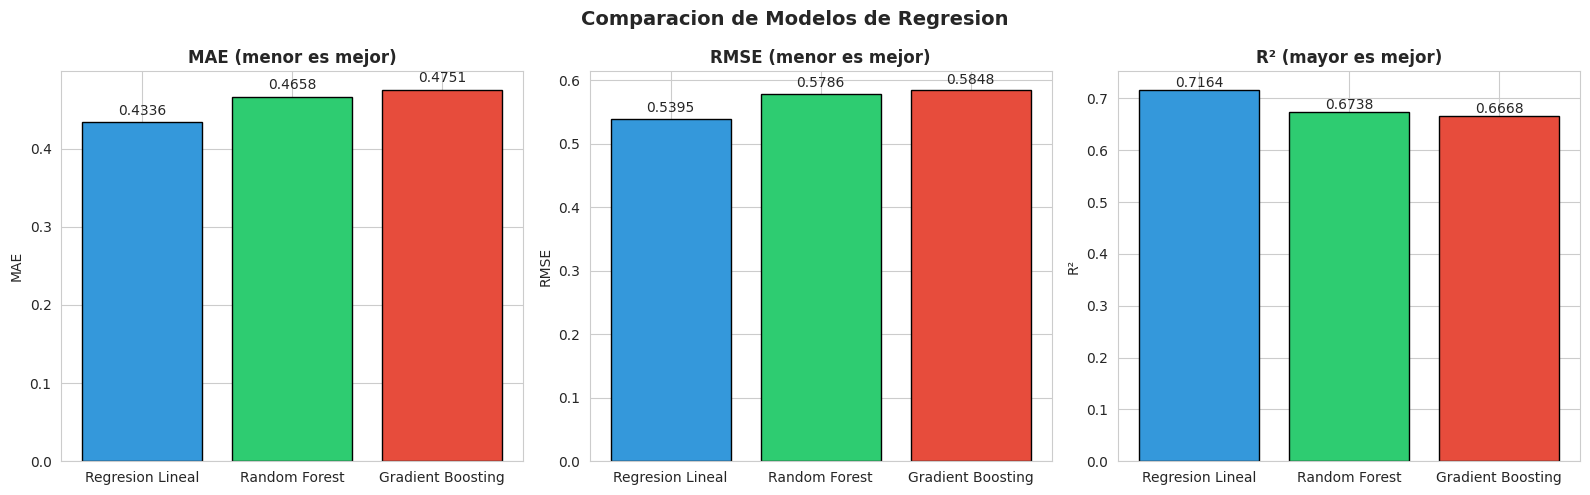

In [ ]:
# Parte 6.2: Grafico comparativo de metricas
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
colores = ['#3498db', '#2ecc71', '#e74c3c']
modelos_nombres = df_resultados.index.tolist()

# MAE
axes[0].bar(modelos_nombres, df_resultados['MAE'], color=colores, edgecolor='black')
axes[0].set_title('MAE (menor es mejor)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('MAE')
for i, v in enumerate(df_resultados['MAE']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

# RMSE
axes[1].bar(modelos_nombres, df_resultados['RMSE'], color=colores, edgecolor='black')
axes[1].set_title('RMSE (menor es mejor)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('RMSE')
for i, v in enumerate(df_resultados['RMSE']):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

# R²
axes[2].bar(modelos_nombres, df_resultados['R²'], color=colores, edgecolor='black')
axes[2].set_title('R² (mayor es mejor)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('R²')
for i, v in enumerate(df_resultados['R²']):
    axes[2].text(i, v + 0.005, f'{v:.4f}', ha='center', fontsize=10)

plt.suptitle('Comparacion de Modelos de Regresion', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

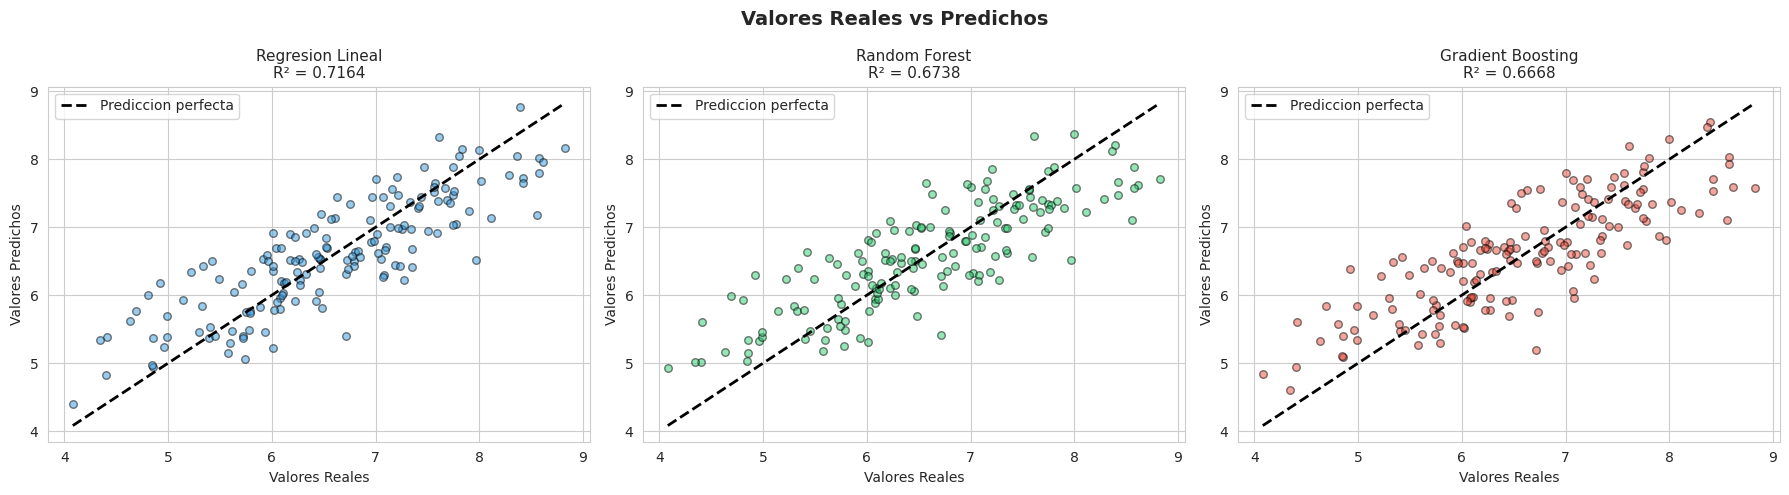

In [ ]:
# Parte 6.3: Grafico de valores reales vs predichos (mejor modelo)
# Se selecciona el mejor modelo dinamicamente
modelos_dict = {
    'Regresion Lineal': (lr_model, y_pred_lr),
    'Random Forest': (rf_model, y_pred_rf),
    'Gradient Boosting': (gb_model, y_pred_gb)
}
best_model_obj, y_pred_best = modelos_dict[mejor_modelo]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
preds = [('Regresion Lineal', y_pred_lr), ('Random Forest', y_pred_rf), ('Gradient Boosting', y_pred_gb)]

for i, (nombre, y_pred) in enumerate(preds):
    axes[i].scatter(y_test, y_pred, alpha=0.5, color=colores[i], edgecolors='black', s=30)
    # Linea de prediccion perfecta
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Prediccion perfecta')
    axes[i].set_xlabel('Valores Reales')
    axes[i].set_ylabel('Valores Predichos')
    axes[i].set_title(f'{nombre}\nR² = {r2_score(y_test, y_pred):.4f}', fontsize=11)
    axes[i].legend()

plt.suptitle('Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

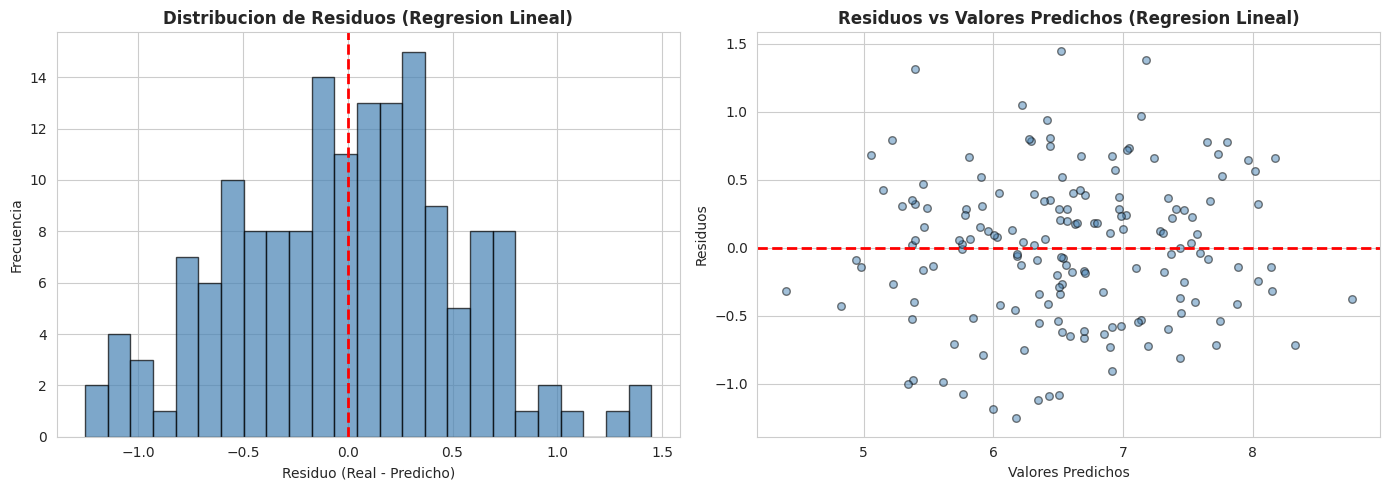

Residuo medio: -0.0040
Desviacion estandar de residuos: 0.5411


In [ ]:
# Parte 6.4: Distribucion de residuos del mejor modelo
residuos = y_test - y_pred_best

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de residuos
axes[0].hist(residuos, bins=25, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title(f'Distribucion de Residuos ({mejor_modelo})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Residuo (Real - Predicho)')
axes[0].set_ylabel('Frecuencia')

# Residuos vs predichos
axes[1].scatter(y_pred_best, residuos, alpha=0.5, color='steelblue', edgecolors='black', s=30)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title(f'Residuos vs Valores Predichos ({mejor_modelo})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuos')

plt.tight_layout()
plt.show()

print(f"Residuo medio: {residuos.mean():.4f}")
print(f"Desviacion estandar de residuos: {residuos.std():.4f}")

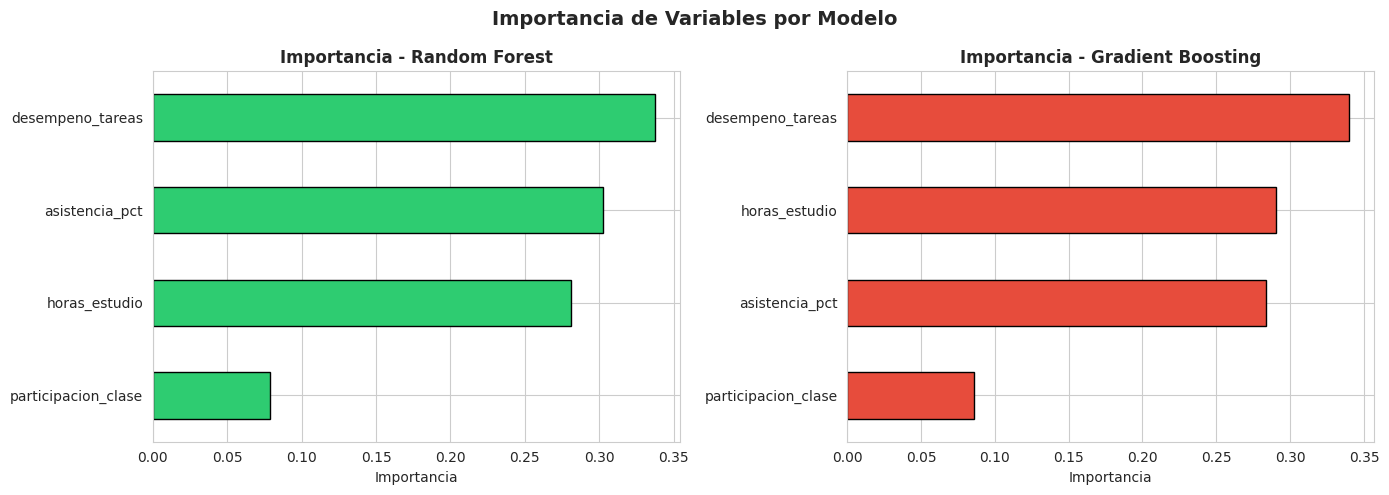

In [ ]:
# Parte 6.5: Comparacion de importancia de features entre modelos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
importances_rf.sort_values().plot(kind='barh', ax=axes[0], color='#2ecc71', edgecolor='black')
axes[0].set_title('Importancia - Random Forest', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Importancia')

# Gradient Boosting
importances_gb.sort_values().plot(kind='barh', ax=axes[1], color='#e74c3c', edgecolor='black')
axes[1].set_title('Importancia - Gradient Boosting', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Importancia')

plt.suptitle('Importancia de Variables por Modelo', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Parte 7: Exportacion de resultados

Se exporta:
1. El **mejor modelo** entrenado en formato `.pkl` para reutilizacion futura.
2. Las **predicciones** del conjunto de prueba en un archivo CSV.
3. La **tabla comparativa** de metricas.

In [ ]:
# Parte 7.1: Guardar el mejor modelo
import os
output_dir = '/Modelos'
os.makedirs(output_dir, exist_ok=True)

# Exportar modelo
modelo_path = os.path.join(output_dir, 'mejor_modelo_regresion.pkl')
joblib.dump(best_model_obj, modelo_path)
print(f"Mejor modelo ({mejor_modelo}) guardado en: {modelo_path}")

# Exportar el scaler para uso futuro
scaler_path = os.path.join(output_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"Scaler guardado en: {scaler_path}")

Mejor modelo (Regresion Lineal) guardado en: /Modelos/mejor_modelo_regresion.pkl
Scaler guardado en: /Modelos/scaler.pkl


In [ ]:
# Parte 7.2: Guardar predicciones y metricas
# Predicciones del conjunto de prueba
df_predicciones = pd.DataFrame({
    'estudiante_id': df.iloc[X_test.index]['estudiante_id'].values,
    'calificacion_real': y_test.values,
    'calificacion_predicha': y_pred_best.round(2),
    'error_absoluto': np.abs(y_test.values - y_pred_best).round(2)
})
pred_path = os.path.join(output_dir, 'predicciones_test.csv')
df_predicciones.to_csv(pred_path, index=False)
print(f"Predicciones guardadas en: {pred_path}")

# Metricas comparativas
metricas_path = os.path.join(output_dir, 'comparacion_modelos.csv')
df_resultados.round(4).to_csv(metricas_path)
print(f"Metricas guardadas en: {metricas_path}")

print(f"\nMuestra de predicciones:")
df_predicciones.head(10)

Predicciones guardadas en: /Modelos/predicciones_test.csv
Metricas guardadas en: /Modelos/comparacion_modelos.csv

Muestra de predicciones:


,estudiante_id,calificacion_real,calificacion_predicha,error_absoluto
0,E0697,8.11,7.14,0.97
1,E0668,7.35,6.41,0.94
2,E0064,5.91,6.53,0.62
3,E0534,5.42,6.50,1.08
4,E0067,7.41,7.29,0.12
5,E0622,7.57,7.65,0.08
6,E0347,6.80,6.63,0.17
7,E0491,8.39,8.76,0.37
8,E0761,7.07,7.44,0.37
9,E0457,6.26,6.53,0.27


## Parte 8: Analisis Critico

A continuacion se responden las 7 preguntas de analisis requeridas para el proyecto de aprendizaje supervisado.


### Pregunta 1: Cual fue la variable mas importante para el modelo? Lo esperabas?

La variable mas importante fue **`desempeno_tareas`**, al ver los datos era esperable.

La evidencia en los tres modelos:

- En **Regresion Lineal**, `desempeno_tareas` tuvo el coeficiente mas alto en magnitud (`+0.4509`), por lo que es la variable con mayor efecto sobre la prediccion cuando las demas se mantienen constantes.
- En **Random Forest**, fue la feature con mayor importancia (`33.8%`), es decir, la que mas contribuyo a reducir el error del modelo.
- En **Gradient Boosting**, tambien fue la mas importante (`34.0%`).

Que esta variable lidere tanto en un modelo lineal como en modelos no lineales sugiere que su aporte es robusto y estable, ademas, desde la logica academica, tiene sentido: el rendimiento en tareas refleja aprendizaje acumulado y constancia, por lo que suele anticipar la calificacion final.

### Pregunta 2: Que modelo generalizo mejor segun las metricas? Por que crees que fue asi?

El modelo que mejor generalizo fue **Regresion Lineal**.

- En test obtuvo el mejor desempeno: `MAE=0.4336`, `RMSE=0.5395`, `R2=0.7164`.
- Tambien tuvo la mejor validacion cruzada: `R2=0.7063 (+/- 0.0210)`.

Esto sugiere que, para este dataset, la relacion entre variables y calificacion final es mayormente lineal y que los modelos no lineales no aportaron mejora adicional.


### Pregunta 3: Que implicaciones tendria un error tipo I o tipo II en este contexto?

Aunque el problema principal es de **regresion**, si se usa el modelo para clasificar estudiantes en riesgo academico:

- **Error tipo I (falso positivo):** clasificar como en riesgo a un estudiante que no lo esta. Implica asignar recursos de apoyo innecesarios.
- **Error tipo II (falso negativo):** no detectar a un estudiante que si esta en riesgo. Es mas critico, porque se pierde la oportunidad de intervencion temprana.

En un caso real educativo, se suele priorizar minimizar los falsos negativos.


### Pregunta 4: Tu dataset presentaba sesgo? Como lo detectaste o mitigaste?

- No hubo duplicados.
- Hubo `72` valores faltantes (24 en asistencia, 24 en horas de estudio, 24 en desempeno en tareas), mitigados con imputacion por mediana.
- Se detectaron pocos outliers (`7` en horas de estudio y `1` en calificacion final) y se conservaron por representar casos reales.

No se evaluo sesgo por grupos demograficos porque el dataset no incluye esas variables. Por tanto, se mitigo sesgo de calidad de datos, pero no sesgo poblacional.


### Pregunta 5: Que dificultades encontraste al preprocesar este conjunto de datos?

Las principales dificultades fueron:

- Tratar valores faltantes en variables predictoras clave sin perder muestras.
- Decidir el manejo de outliers (se decidio conservarlos por valor informativo).
- Evitar fuga de informacion (el `StandardScaler` se ajusto solo con entrenamiento).
- Mantener una separacion correcta entre entrenamiento y prueba para evaluar de forma valida.


### Pregunta 6: Cambiarias las metricas de evaluacion si el proyecto fuera aplicado en el mundo real?

Si. MAE, RMSE y R2 son adecuadas para comparacion tecnica, pero en aplicacion real anadiria:

- Metricas por subgrupos de estudiantes (equidad y estabilidad del error).
- Porcentaje de predicciones dentro de un margen aceptable (por ejemplo +/-0.5 puntos).
- Metricas orientadas a decision (si se usa para alertas: precision, recall y costo de intervencion).


### Pregunta 7: Que mejora aplicarias si tuvieras mas tiempo o mas datos?

Aplicaria estas mejoras:

- Optimizacion sistematica de hiperparametros (`GridSearchCV` o `RandomizedSearchCV`).
- Validacion mas robusta (repetida y analisis de estabilidad temporal).
- Incorporar nuevas variables relevantes (historial academico, habitos de estudio, contexto).
- Evaluar interpretabilidad y calibracion para apoyar decisiones pedagogicas.


## Conclusiones

- Se desarrollaron 3 modelos de regresion (Lineal, Random Forest, Gradient Boosting) para predecir la calificacion final de estudiantes.
- El **modelo con mejor desempeno fue Regresion Lineal**, con `MAE=0.4336`, `RMSE=0.5395` y `R2=0.7164` en el conjunto de prueba.
- La variable con mayor peso fue **desempeno_tareas**, seguida de **asistencia_pct** y **horas_estudio**, consistente entre modelos.
- El pipeline de preprocesamiento (imputacion, escalado y control de fuga de informacion) permitio una evaluacion valida y comparable.
- El modelo puede utilizarse como herramienta de **alerta temprana** para apoyar decisiones academicas, considerando validaciones adicionales antes de uso operativo.

